In [3]:
import chainer

In [4]:
chainer.print_runtime_info()

Platform: Darwin-18.7.0-x86_64-i386-64bit
Chainer: 6.5.0
ChainerX: Not Available
NumPy: 1.16.2
CuPy: Not Available
iDeep: Not Available


In [5]:
from sklearn.datasets import load_iris
x, t = load_iris(return_X_y=True)
print(x.shape)
print(t.shape)

(150, 4)
(150,)


In [12]:
t

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [6]:
x = x.astype("float32")
t = t.astype("int32")

In [7]:
from sklearn.model_selection import train_test_split
x_train_val, x_test, t_train_val, t_test = train_test_split(x,t, test_size=0.3, random_state=0)

In [8]:
x_train, x_val, t_train, t_val = train_test_split(x_train_val, t_train_val, test_size=0.3, random_state=0)

In [9]:
import chainer.links as L
import chainer.functions as F

In [10]:
l = L.Linear(3,2)

In [11]:
from chainer import Sequential

In [13]:
n_input = 4
n_hidden = 10
n_output = 3

net = Sequential(
    L.Linear(n_input, n_hidden), F.relu,
    L.Linear(n_hidden, n_hidden), F.relu,
    L.Linear(n_hidden, n_output)
)

In [14]:
optimizer = chainer.optimizers.SGD(lr=0.01)
optimizer.setup(net)

In [15]:
n_epoch = 30
n_batchsize = 16

In [16]:
import numpy as np

In [26]:
iteration = 0
results_train = {
    "loss":[],
    "accuracy":[]
}
results_valid = {
    "loss":[],
    "accuracy":[]
}

for epoch in range(n_epoch):
    order = np.random.permutation(range(len(x_train)))
    
    loss_list = []
    accuracy_list = []
    
    for i in range(0, len(order), n_batchsize):
        index = order[i:i+n_batchsize]
        x_train_batch = x_train[index,:]
        t_train_batch = t_train[index]
        y_train_batch = net(x_train_batch)
        
        loss_train_batch = F.softmax_cross_entropy(y_train_batch, t_train_batch)
        accuracy_train_batch = F.accuracy(y_train_batch, t_train_batch)
        
        loss_list.append(loss_train_batch.array)
        accuracy_list.append(accuracy_train_batch.array)
        
        net.cleargrads()
        loss_train_batch.backward()
        
        optimizer.update()
        
        iteration += 1
    
    loss_train = np.mean(loss_list)
    accuracy_train = np.mean(accuracy_list)
    
    with chainer.using_config("train", False), chainer.using_config("enable_backprop", False):
        y_val = net(x_val)
    
    loss_val = F.softmax_cross_entropy(y_val, t_val)
    accuracy_val = F.accuracy(y_val, t_val)
    
    print(print('epoch: {}, iteration: {}, loss (train): {:.4f}, loss (valid): {:.4f}'.format(
        epoch, iteration, loss_train, loss_val.array)))
    results_train['loss'] .append(loss_train)
    results_train['accuracy'] .append(accuracy_train)
    results_valid['loss'].append(loss_val.array)
    results_valid['accuracy'].append(accuracy_val.array)

epoch: 0, iteration: 5, loss (train): 0.3274, loss (valid): 0.2468
None
epoch: 1, iteration: 10, loss (train): 0.3247, loss (valid): 0.2432
None
epoch: 2, iteration: 15, loss (train): 0.3101, loss (valid): 0.2391
None
epoch: 3, iteration: 20, loss (train): 0.3427, loss (valid): 0.2584
None
epoch: 4, iteration: 25, loss (train): 0.3136, loss (valid): 0.2331
None
epoch: 5, iteration: 30, loss (train): 0.3050, loss (valid): 0.2417
None
epoch: 6, iteration: 35, loss (train): 0.3181, loss (valid): 0.2277
None
epoch: 7, iteration: 40, loss (train): 0.3003, loss (valid): 0.2229
None
epoch: 8, iteration: 45, loss (train): 0.2996, loss (valid): 0.2200
None
epoch: 9, iteration: 50, loss (train): 0.2781, loss (valid): 0.2167
None
epoch: 10, iteration: 55, loss (train): 0.2955, loss (valid): 0.2242
None
epoch: 11, iteration: 60, loss (train): 0.3006, loss (valid): 0.2115
None
epoch: 12, iteration: 65, loss (train): 0.2796, loss (valid): 0.2092
None
epoch: 13, iteration: 70, loss (train): 0.2808, l

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

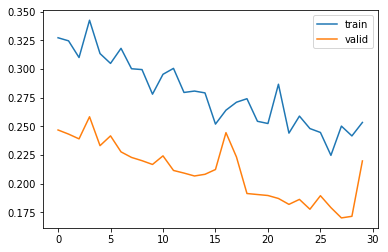

In [27]:
plt.plot(results_train['loss'], label='train')  # label で凡例の設定
plt.plot(results_valid['loss'], label='valid')  # label で凡例の設定
plt.legend()  # 凡例の表示